**Ask a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer.**

A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an
Ensemble Learning algorithm is called an **Ensemble method**.

The most popular Ensemble methods, including 

*   bagging
*   boosting
*   stacking
*   etc..

We will also explore Random Forests.

# Voting Classiers

aggragates multiple weak classifiers results and gets a better accuraccy.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples = 5000, noise=0.4, shuffle=True)
moons = np.concatenate([X, Y.reshape(Y.size, 1)], axis=1)
moons

array([[ 0.00942865,  0.06430328,  1.        ],
       [-0.43258809,  0.81312233,  0.        ],
       [ 0.87245003,  0.31830785,  0.        ],
       ...,
       [ 0.64272544, -0.05377276,  1.        ],
       [ 1.10378948, -0.98107598,  1.        ],
       [-0.88917592,  0.61221029,  0.        ]])

In [ ]:
def splitTT(data, test_size, **kwargs):

  from sklearn.model_selection import train_test_split

  train_set, test_set = train_test_split(data, test_size=test_size, **kwargs)

  x_train, y_train = train_set[::, 0:2], train_set[::, -1]
  x_test, y_test = test_set[::, 0:2], test_set[::, -1]

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = splitTT(moons, 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
                        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                        voting='hard')
voting_clf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.808
RandomForestClassifier 0.8446666666666667
SVC 0.8533333333333334
VotingClassifier 0.852


**voting = hard** find majority label

**voting = sort** find majority label with weightage to higher probability

by default svc don't calculate probability

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(
                        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                        voting='soft')
voting_clf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.808
RandomForestClassifier 0.8413333333333334
SVC 0.8533333333333334
VotingClassifier 0.8533333333333334


# **Bagging and Pasting**

Above we saw classifiers are of very different training algorithms.

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

When sampling is performed with replacement, this method is called **bagging** (short for **bootstrap aggregating**), bagging does row sampling.

When sampling is performed without replacement, it is called **pasting**.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)

# n_estimators = use this much ensemble's 
# max_samples = train each ensemble with this much dataset instances
# n_jobs = cpu cores to use, -1 mean use all
# bootstrap = True bagging, False paging

bag_clf.fit(x_train, y_train)
bag_clf_y_pred = bag_clf.predict(x_test)

d_tree_clf = DecisionTreeClassifier()
d_tree_clf.fit(x_train, y_train)
d_tree_clf_y_pred = d_tree_clf.predict(x_test)

print("BaggingClassifier ", accuracy_score(bag_clf_y_pred, y_test))
print("DecisionTreeClassifier ", accuracy_score(d_tree_clf_y_pred, y_test))

BaggingClassifier  0.8533333333333334
DecisionTreeClassifier  0.7993333333333333


To perform **pasting** set `bootstrap = False`

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=False, n_jobs=-1)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8533333333333334

## **Out-of-Bag Evaluation**

Only about 63% of the training instances are sampled on
average for each predictor.6

The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances.

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. Set `oob_score=True`.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print("oob prediction: ",bag_clf.oob_score_)
print("x_test prediction:", accuracy_score(y_test, y_pred))

oob prediction:  0.8722857142857143
x_test prediction: 0.8546666666666667


# **Random Patches and Random Subspaces**

**Random Subspaces**

Purpose is to increase variation among the predictors in an ensemble model. This is done as decreasing the correlation between the predictors **increases the performance of the ensemble model**. The random subspace method is also known as **feature or attribute bagging**.

What it does is, it creates subsets of the training set that only contain certain features. The chosen number of features are randomly sampled from the training set with replacement. However, most implementations allow the user to specify whether or not they would like features to be sampled with or without replacement

**Random Patches**

When the random subspace method is used along with bagging or pasting it is known as the random patches method.

## **Reduces Variance**

**Variance** Model changes a lot with change in variance.

In bagging changing a sub-set to test-instances only few models change and dosent affect's result much.

Bagging can reduce variance without change in bias.

bagging can combine **low bias high variance** models and convert them to **low bias reduced variance** model.

Example of low bias and high variance ALGO is DT.

# **Random Forests**

Random Forests = `DecisionTree + Bagging(row sampling) + **column sampling( feature bagging)**`


A Random Forest is an **ensemble of Decision Trees**. Generally
trained via the bagging method (or sometimes pasting).

Random Forest is optimised for Decesion Tree than BaggingClassifier.

![image.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Chapter%20Notes/7_Ensembler/assets/row_sampling.png)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# set max_depth = None for creating a depth tree
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

Same implementation with bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
                          DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                          n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, bootstrap_features = True)

bag_clf.fit(x_train, y_train)
y_pred_bag_clf = bag_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

print('RandomForestClassifier ', accuracy_score(y_pred_rf, y_test))
print('BaggingClassifier ', accuracy_score(y_pred_bag_clf, y_test))

RandomForestClassifier  0.85
BaggingClassifier  0.8546666666666667


## **Extra-Trees**

Decision Tree = `row_sampling + col_sampling `

ExtraTreesClassifier = `row_sampling + col_sampling + randomized_selection_TAU`

Because of **randomized_selection_TAU** variance is reduced even more than RandomForest.

Using **random thresholds** for each feature rather than searching for the best possible thresholds(like regular Decision Trees do) is simply called an **Extremely Randomized Trees** ensemble.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

rnd_ex_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_ex_clf.fit(x_train, y_train)
y_pred_rf_ex = rnd_ex_clf.predict(x_test)

print('ExtraTreesClassifier ', accuracy_score(y_pred_rf_ex, y_test))

ExtraTreesClassifier  0.8453333333333334


Random Forests measure the
relative **importance of each feature**. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest).

see the result using the **feature_importances_** variable

In [ ]:
rnd_ex_clf.feature_importances_

array([0.43140392, 0.56859608])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.10272299420647843
sepal width (cm) 0.025093761814261036
petal length (cm) 0.4379436354727006
petal width (cm) 0.43423960850655996


# **Boosting**

The general idea of most boosting methods is to **train predictors sequentially, each trying to correct its predecessor**.


![image.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Chapter%20Notes/7_Ensembler/assets/bagging-and-boosting.png)


Bagging   : **high-variance , low-bias**  +   **randomization + aggregation** = **reduces-variance**
Boosting  : **low-variance  , high-bias** + **additive-conbining** = **reduces-bias**

Error = Bias^2 + varaince + E



*   AdaBoost
*   Gradient Boosting



## **AdaBoost**

AdaBoost classifier works by giving weight's to training instances, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on..


[Example](https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=lectures.boosting#:~:text=of%20the%20relationship%3A-,A%20toy%20example%20from%20Schapire%27s%20tutorial,The%20final%20classifier,-AdaBoost%20as%20exponential)

[Video Tutorial](https://www.youtube.com/watch?v=NLRO1-jp5F8&t=1s)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
                          DecisionTreeClassifier(max_depth=1), n_estimators=200,
                          algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = ada_clf.predict(x_test)

accuracy_score(y_pred, y_test)

0.8473333333333334

##**Gradient Boosting**

Sequentially adding predictors to an ensemble, each one
correcting its predecessor.

This method tries to fit the new predictor to the residual
errors made by the previous predictor.

[Gradient Boosting Algo](https://en.wikipedia.org/wiki/Gradient_boosting#:~:text=Input%3A%20training%20set,Output)

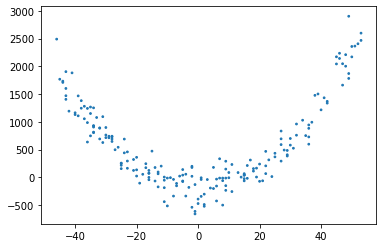

In [ ]:
x = np.round(100*np.random.rand(200))
x = np.round(x-x.mean())
x.sort()
y = x**2 + np.random.normal(-200, 200, x.size)

plt.scatter(x, y, s = np.full(x.size, 3))

# rand = np.random.permutation(np.arange(x.size))
# rand_train = rand[:150]
# rand_train.sort()
# rand_test = rand[150:]
# rand_test.sort()

# x_train = x.reshape(x.size, 1)[rand_train]
# y_train = y[rand_train]
# x_test = x.reshape(x.size, 1)[rand_test]
# y_test = y[rand_test]

x_train = x.reshape(x.size, 1)
y_train = y

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x_train, y_train)
y_predict1 = tree_reg1.predict(x_train)
# Now train a second DecisionTreeRegressor on the residual errors made by the first predictor:

y2 = y_train - y_predict1
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x_train, y2)
y_predict2 = tree_reg2.predict(x_train)

# Then we train a third regressor on the residual errors made by the second predictor:

y3 = y2 - y_predict2
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x_train, y3)
y_predict3 = tree_reg3.predict(x_train)
# create overall prediction by adding all predictions




In [ ]:
print("y1 prediction ", mean_squared_error(y_predict1, y_train))
print("y2 prediction ", mean_squared_error(y_predict1 + y_predict2, y_train))
print("y3 prediction ", mean_squared_error(y_predict1 + y_predict2 + y_predict3, y_train))

y1 prediction  124788.39050794001
y2 prediction  67417.95885652029
y3 prediction  61931.12085016351


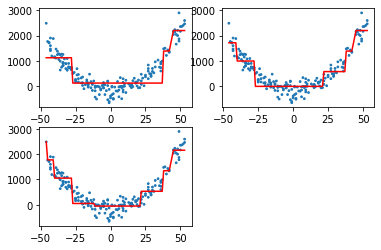

In [ ]:
import matplotlib.pyplot as plt

plt1 = plt.subplot(2,2 ,1)
plt2 = plt.subplot(2,2 ,2)
plt3 = plt.subplot(2,2 ,3)

plt1.scatter(x,y, s = np.ones(x.size)*3)
plt1.plot(x_train,y_predict1, color='r')

plt2.scatter(x,y, s = np.ones(x.size)*3)
plt2.plot(x_train,y_predict1+y_predict2, color='r')

plt3.scatter(x,y, s = np.ones(x.size)*3)
plt3.plot(x_train,y_predict1+y_predict2+y_predict3, color='r')

Using very less predictors will have less accuraccy, using many predictors will overfit the training set, use **Early Stoping** to prevent this.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=300,)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(x_test)]
print(errors)
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators,)
gbrt_best.fit(x_train, y_train)

y_pred = gbrt_best.predict(x_test)

print(mean_squared_error(y_test, y_pred))

[370833.4908313579, 328772.29326948436, 294328.98407265614, 265411.3541052665, 233092.66150777956, 205483.31316928603, 182209.27862830757, 160360.60272507637, 144606.05722018707, 128901.31430586093, 114809.59894702792, 104370.75174845976, 94565.89991617996, 88457.97885295075, 80570.16358846093, 72249.32884472162, 65532.63188358587, 62043.83388108611, 57405.579706132434, 53322.740690653816, 51056.641975168975, 48650.93077754662, 45435.60486028917, 43381.42161492738, 40932.17617997019, 40274.168855167365, 38861.9486114403, 38186.33152030716, 36846.76639082678, 35887.67158955345, 35666.211746982146, 35325.38134226561, 34518.223095211426, 34542.98717964986, 34568.06475376799, 34200.27241261066, 34073.892040597406, 33822.16852963089, 33926.503843649116, 33994.76804177888, 33944.918984276075, 33906.29818895262, 33721.63756123979, 34007.51291287415, 34336.45150793654, 34257.566343696926, 34250.474355845974, 34119.80940555276, 34120.00539043317, 34166.09126436678, 34029.39324686004, 34263.8873

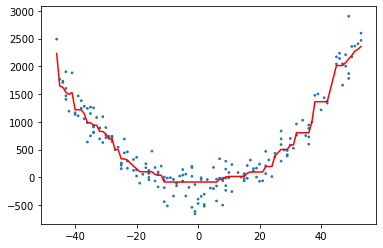

In [ ]:
plt.scatter(x,y, s = np.ones(x.size)*3)
plt.plot(x,gbrt_best.predict(x_train), color='r')

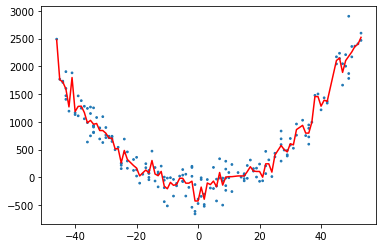

In [ ]:
plt.scatter(x,y, s = np.ones(x.size)*3)
plt.plot(x,gbrt.predict(x_train), color='r')

**Implement early stopping by actually stopping training early, You can do so by setting `warm_start=True`.**

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
          break # early stopping

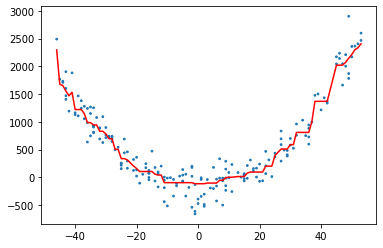

In [ ]:
plt.scatter(x,y, s = np.ones(x.size)*3)
plt.plot(x,gbrt.predict(x_train), color='r')

Better implemntation of boosting then GBDT is **XGBoost**.

XGBoost has `row sampling` + `col sampling` + `L1,L2 regularization`

In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=3)

y_pred = xgb_reg.predict(x_test)

print(mean_squared_error(y_pred, y_test))

#**Stacking**

It is based on a simple idea: instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble,
why don’t we **train a model to perform this aggregation**?

[Algorithm](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)

# **Cascading Classifier**

Another good boosting thing...